### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [622]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [623]:
# Read in the data in CSV format
data = pd.read_csv('data/coupons.csv')

In [624]:
# Show the first few records of data, and visually scan them
data.head()
# Show the last few records of data, and visually scan them
#data.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Check for Null Values
Next we need to see what kind of variables we're looking at, and how many null values we have. I'll use df.info() for this



In [625]:
# Look at the info for each column, especially the non-null count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
#car has only 108 non-null values, which implies this column has not much data and can be dropped
# Bar has 12577 non-null values 
# CoffeeHouse has 12467 non-null values
# CarryAway             12533 non-null 
# RestaurantLessThan20  12554 non-null  
# Restaurant20To50      12495 non-null

In [626]:
data.shape

(12684, 26)

In [627]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [628]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

#updating the null values with the mode value of the columns with null ex. Bar, CarryAway, CoffeeHouse etc

In [629]:
#99% of the records have null value in the column car. Dropping off the column car 
data_clean = data.drop(columns = ['car'])
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [630]:
# Print the columns that have null counts greater than 0, with the number of NaNs
null_counts = data_clean.isna().sum()
null_counts = null_counts[null_counts > 0]
print(null_counts)

Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
dtype: int64


In [631]:
# Drop all rows that have a null value (nan)
data_clean = data_clean.dropna()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [632]:
# Evaluate impact on data set
data_retention = len(data_clean) / len(data) * 100
print(f"Amount of original data set retained after cleaning: {data_retention:.2f}%")

Amount of original data set retained after cleaning: 95.23%


In [633]:
data_clean.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [634]:
data_clean.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [635]:
# Look for extreme outliers in the quantitative data
data_clean.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12079.000000,12079.000000,12079.0,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,63.334713,0.408478,1.0,0.561222,0.119381,0.215167,0.784833,0.569335
std,19.133246,0.491573,0.0,0.496258,0.324249,0.410955,0.410955,0.495190
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [636]:
data_clean['destination'].unique() 

array(['No Urgent Place', 'Home', 'Work'], dtype=object)

In [637]:
data_clean['passanger'].unique() 

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [638]:
data_clean['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

Rename Some Columns
The "passangar" column is mispelled, so we'll rename it correctly as "passenger". Some columns have inconsistent capitalization. We'll clean this up to make it easier for us to do the analysis.



In [639]:
# Rename the 'passanger' column to 'passenger' and rename others for consistency/clarity
data_clean.rename(columns={'passanger':'passenger',
                         'maritalStatus':'marital_status',
                         'Bar':'bar',
                         'CoffeeHouse':'coffee_house',
                         'CarryAway':'carry_away',
                         'RestaurantLessThan20':'restaurant_less_than_20',
                         'Restaurant20To50':'restaurant_20_to_50',
                         'toCoupon_GEQ5min':'distance_5_mins',
                         'toCoupon_GEQ15min':'distance_15_mins',
                         'toCoupon_GEQ25min':'distance_25_mins',
                         'Y':'accepted_coupon'
                        }, inplace=True)
data_clean.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,coffee_house,carry_away,restaurant_less_than_20,restaurant_20_to_50,distance_5_mins,distance_15_mins,distance_25_mins,direction_same,direction_opp,accepted_coupon
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


### Data Transformation

### Drop Redundant Columns

* **Direction** is captured in 2 separate columns: direction_same, direction_opp (both with Yes = 1, No = 0). They are the inverse of each other. I merge them, column "direction_same" already represents the merged state (same = 1, opposite = 0). So I will **drop "direction_opp".**
* 
* **Gender** has values of "Male" and "Female", I am adding as a new column called "gender_enc" with values as 0 and 1. I'll retain the original column for categorical and other dimensioning.
    * Male: **0**
    * Female: **1**
### Categorical Variable Encodings
Some of the caterical columns have the values stored as numeric range. I am converting them convert them to a numeric scale that represents the lower edge of each range. It is more fidelity than pure nominal values, but we don't know if this is the actual value each record had. We can only say "it's at least this value".
* **Age** will be converted as follows in a new column called "age_enc". 
    * below21: **20**
    * 21: **21**
    * 26: **26**
    * 31: **31**
    * 36: **36**
    * 41: **41**
    * 46: **46**
    * 50plus: **50**
* **Visit Frequencies** – I will retain the original categorical values, but create a new variable that has the closest numeric match (low end of each range) for correlations:
    * **Bar** will be converted as follows in a new column called "bar_enc":
        * never: **0**
        * less1: **0**
        * 1~3: **1**
        * 4~8: **4**
        * gt8: **8**
    * **Coffee House** will be converted as follows in a new column called "coffee_house_enc":
        * never: **0**
        * less1: **0**
        * 1~3: **1**
        * 4~8: **4**
        * gt8: **8**
    * **Carry Away** will be converted as follows in a new column called "carry_away_enc":
        * never: **0**
        * less1: **0**
        * 1~3: **1**
        * 4~8: **4**
        * gt8: **8**
    * **Restaurant Less Than 20** will be converted as follows in a new column called "restaurant_less_than_20_enc":
        * never: **0**
        * less1: **0**
        * 1~3: **1**
        * 4~8: **4**
        * gt8: **8**
    * **Restaurant 20 to 50** will be converted as follows in a new column called "restaurant_20_to_50_enc":
        * never: **0**
        * less1: **0**
        * 1~3: **1**
        * 4~8: **4**
        * gt8: **8**
          
### Normalize Measurement Units

* **Expiration** has 2 values, one in hours (2h), and one in days (1d). I will convert these to hours and drop the "h" and "d" so it can be a pure numeric value in a new column "expiration_enc":
    * 2h: **2**
    * 1d: **24**
* **Time** is coded using both AM and PM, but we can convert to 24 hour time as a new column "time_enc":
    * 7AM: **7**
    * 10AM: **10**
    * 2PM: **14**
    * 6PM: **18**
    * 10PM: **22**
      


In [640]:
# drop the "direction_opp" column
data1_enc = data_clean.drop('direction_opp', axis=1)

In [641]:
# Map the value changes for gender
gender_map = {'Male':0, 'Female':1}

# Apply the map and create a new column "gender_enc"
data1_enc['gender_enc'] = data1_enc['gender'].map(gender_map)
data1_enc.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,coffee_house,carry_away,restaurant_less_than_20,restaurant_20_to_50,distance_5_mins,distance_15_mins,distance_25_mins,direction_same,accepted_coupon,gender_enc
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,0,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,0,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,0,0


In [642]:
# Map the value changes for age
age_map = {'below21': 20,
           '21': 21,
           '26': 26,
           '31': 31,
           '36': 36,
           '41': 41,
           '46': 46,
           '50plus': 50}

# Apply the map and create a new column "age_enc"
data1_enc['age_enc'] = data1_enc['age'].map(age_map)

In [643]:
# Map the value changes for time
time_map = {'7AM': 7,
           '10AM': 10,
           '2PM': 14,
           '6PM': 18,
           '10PM': 22}

# Apply the map and create a new column "time_enc"
data1_enc['time_enc'] = data1_enc['time'].map(time_map)

In [644]:
# Map the value changes for expiration
expiration_map = {'2h': 2, '1d': 24}

# Apply the map and create a new column "expiration_enc"
data1_enc['expiration_enc'] = data1_enc['expiration'].map(expiration_map)

In [645]:
# Map the value changes for bar, coffee_house, carry_away, restaurant_less_than_20, restaurant_20_to_50
freq_map = {'never': 0,
            'less1': 0,
            '1~3': 1,
            '4~8': 4,
            'gt8': 8}

# Apply the frequency map and create a new column "bar_enc"
data1_enc['bar_enc'] = data1_enc['bar'].map(freq_map)

# Apply the frequency map and create a new column "coffee_house_enc"
data1_enc['coffee_house_enc'] = data1_enc['coffee_house'].map(freq_map)

# Apply the frequency map and create a new column "carry_away_enc"
data1_enc['carry_away_enc'] = data1_enc['carry_away'].map(freq_map)

# Apply the frequency map and create a new column "restaurant_less_than_20_enc"
data1_enc['restaurant_less_than_20_enc'] = data1_enc['restaurant_less_than_20'].map(freq_map)

# Apply the frequency map and create a new column "restaurant_20_to_50_enc"
data1_enc['restaurant_20_to_50_enc'] = data1_enc['restaurant_20_to_50'].map(freq_map)

In [650]:
# Map the value changes for income
income_map = {'Less than $12500': 1,
              '$12500 - $24999': 12500,
              '$25000 - $37499': 25000,
              '$37500 - $49999': 37500,
              '$50000 - $62499': 50000,
              '$62500 - $74999': 62500,
              '$87500 - $99999': 87500,
              '$75000 - $87499': 75000,
              '$100000 or More': 100000}

# Apply the map and create a new column "income_enc"
data1_enc['income_enc'] = data1_enc['income'].map(income_map)

In [646]:
# List the values from "occupation" that represent "unemployed"
unemployed_list = ['Unemployed','Student','Retired']

# Create a new column for "employed" based on the occupation value mappings 
data1_enc['employed'] = data1_enc['occupation'].apply(lambda x: 0 if x in unemployed_list else 1)

In [647]:
# Map the value changes to conver "education" to "education_years"
education_map = {'Some High School': 2,
                 'High School Graduate': 4,
                 'Some college - no degree': 6,
                 'Associates degree': 6,
                 'Bachelors degree': 8,
                 'Graduate degree (Masters or Doctorate)': 10}

# Apply the frequency map and create a new column "bar_enc"
data1_enc['education_years'] = data1_enc['education'].map(education_map)

In [651]:
participant_variables = ['marital_status',
                         'has_children',
                         'education',
                         'education_years',
                         'gender_enc',
                         'age_enc',
                         'income_enc',
                         'bar_enc',
                         'coffee_house_enc',
                         'carry_away_enc',
                         'restaurant_less_than_20_enc',
                         'restaurant_20_to_50_enc',
                         'employed']

# Create new dataframes from "data1_enc" that contain just the above variable lists
data_part = data1_enc[participant_variables].copy()

#### Primary Correlations

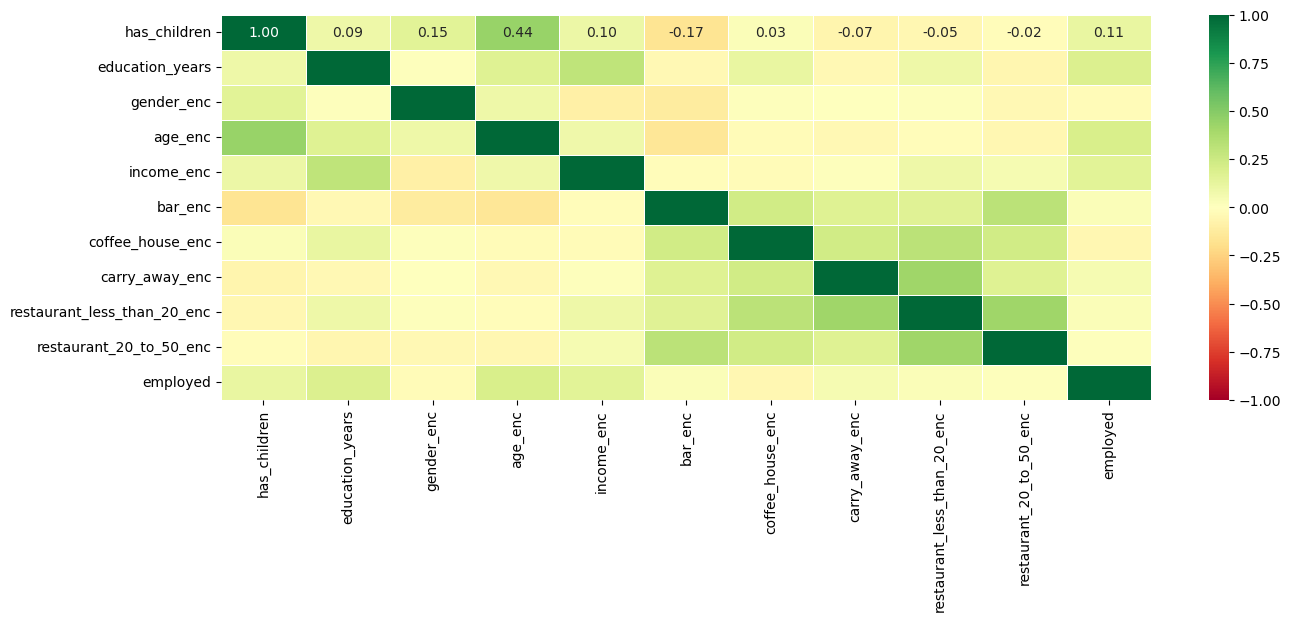

In [654]:
# Create the correlation, rounding decimels to 2
corr_enc = round(data_part.corr(numeric_only=True), 2)

# Plot the correlation using sns.heatmap
plt.figure(figsize=(15, 5))

sns.heatmap(corr_enc, annot=True, cmap="RdYlGn", vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)

plt.show()

Here is the outcome from the correlation matrix above:
   
        The strongest positive correlation is between Age and Has Children, its moderate at 0.44
        The strongest negative correlation is between Bar and Has Children, its at -0.17. 
        Income and Education Years had a moderate positive correlation at 0.3
        Age and Employed had a weak positive correlation at 0.20
        Age and Education Years had a weak positive correlation at 0.15
        Bar and Has Children had a weak negative correlation at -0.17, suggesting people with children visit bars less frequently
        Bar and Age</b> had a weak negative correlation at -0.715, suggesting younger people visit bars more frequently
    

4. What proportion of the total observations chose to accept the coupon? 

In [612]:

# Calculate percent that accepted vs. total number of records
percent_accepted = data1_enc['accepted_coupon'].mean() * 100
print(f"Proportion of total observations that chose to accept the coupon: {percent_accepted:.2f}%")

Proportion of total observations that chose to accept the coupon: 56.93%


In [662]:

data1_enc.groupby(['accepted_coupon', 'coupon']).size()   


accepted_coupon  coupon               
0                Bar                      1125
                 Carry out & Take away     598
                 Coffee House             1922
                 Restaurant(20-50)         785
                 Restaurant(<20)           772
1                Bar                       788
                 Carry out & Take away    1682
                 Coffee House             1894
                 Restaurant(20-50)         632
                 Restaurant(<20)          1881
dtype: int64

5. Use a bar plot to visualize the `coupon` column.

#### "Use a bar plot to visualize the coupon column."
I'm using a Seaborn `sns.countplot()` to create the following bar chart

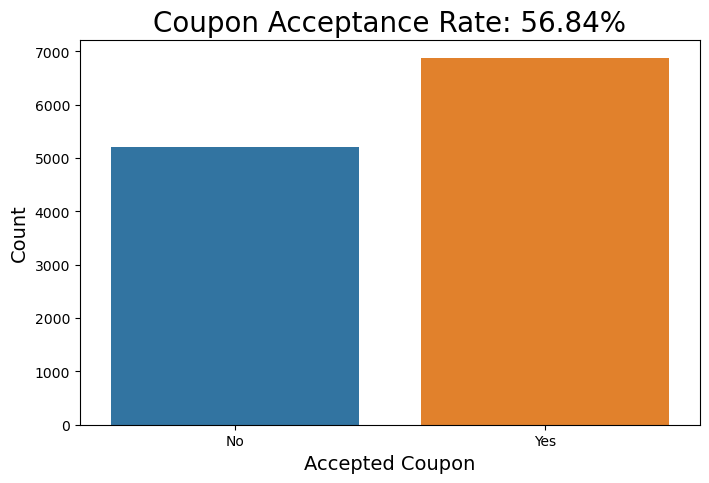

In [614]:
# Create the countplot
plt.figure(figsize=(8,5))
sns.countplot(data=data1_enc, x='accepted_coupon')
plt.title('Coupon Acceptance Rate: 56.84%', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Accepted Coupon', fontsize=14)
ax = plt.gca()
ax.set_xticklabels(["No", "Yes"])
plt.show()

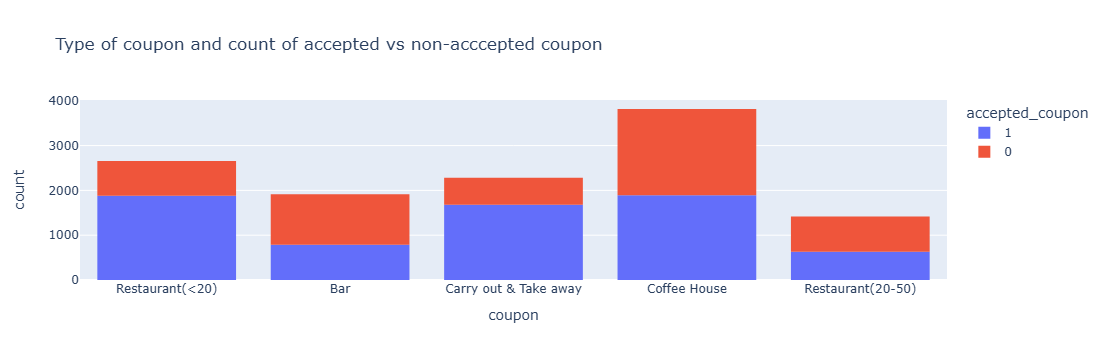

In [660]:
px.histogram(data1_enc, x = "coupon", title = 'Type of coupon and count of accepted vs non-acccepted coupon', color ="accepted_coupon", )

#Conclusion - Maximum number of coupons are for Coffee House and even the most number of Coffee house coupons have been accepted by the customers as compared to other categories of cooupon.

### Temperature

6. Use a histogram to visualize the temperature column.

In [663]:
data1_enc["temperature"].unique()

array([55, 80, 30], dtype=int64)

I'm using a Seaborn `sns.histplot()` to plot the distribution of temperatures against accepted_coupon

C:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



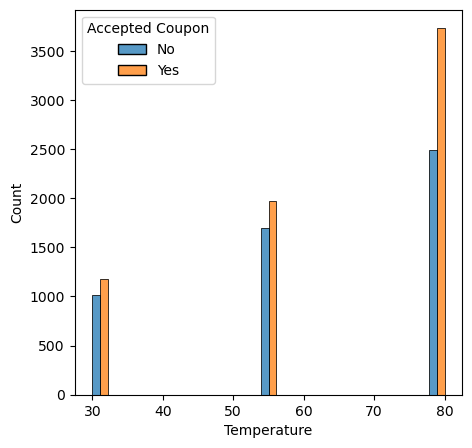

In [664]:
plt.figure(figsize=(5,5))
#sns.histplot(data = data1_enc, x = 'temperature', hue ='accepted_coupon')
data1_enc = data1_enc.replace([np.inf, -np.inf], np.nan)

sns.histplot(data = data1_enc, x='temperature', multiple='dodge',  hue='accepted_coupon')
plt.xlabel('Temperature')
plt.ylabel('Count')
legend = plt.gca().get_legend()
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
legend.set_title('Accepted Coupon')

I'm also creating a heatmap using a Seaborn `sns.heatmap()`

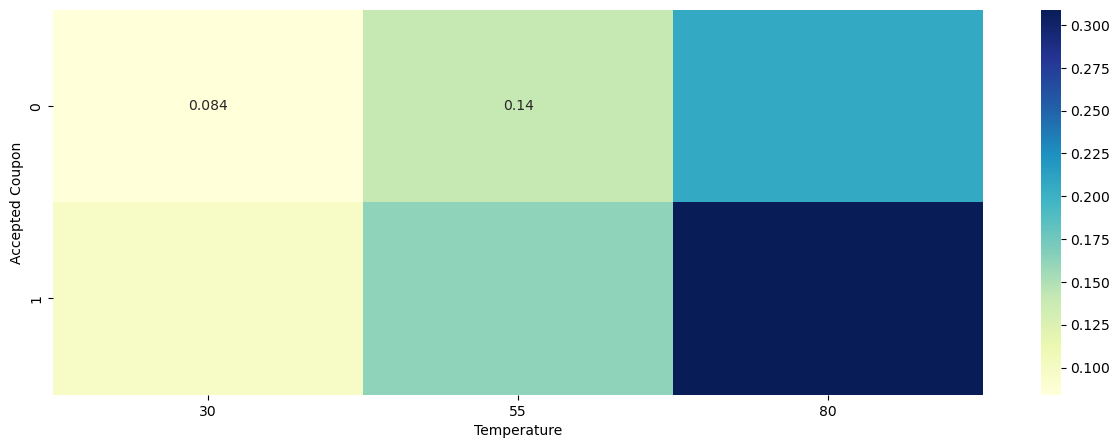

In [666]:

plt.figure(figsize=(15, 5))
temp_crosstab = pd.crosstab(data1_enc.accepted_coupon, data1_enc.temperature, normalize = True)
sns.heatmap(temp_crosstab, annot=True, cmap='YlGnBu')
plt.xlabel('Temperature')
plt.ylabel('Accepted Coupon')
plt.show()

In [670]:
# Calculate percent of accepts (Yes vs No) in each temperature condition to double-check what we're seeing
data_temp_80 = data1_enc.query("temperature == 80").groupby('accepted_coupon')['accepted_coupon'].count()
print("Temperature 80 count of accept and non-accepted coupon")
print(round(data_temp_80 / len(data1_enc.query("temperature == 80")) * 100, 2))



Temperature 80 count of accept and non-accepted coupon
accepted_coupon
0    40.04
1    59.96
Name: accepted_coupon, dtype: float64


In [671]:
data_temp_55 = data1_enc.query("temperature == 55").groupby('accepted_coupon')['accepted_coupon'].count()
print("Temperature 55 count of accept and non-accepted coupon")
print(round(data_temp_55 / len(data1_enc.query("temperature == 55")) * 100, 2))


Temperature 55 count of accept and non-accepted coupon
accepted_coupon
0    46.29
1    53.71
Name: accepted_coupon, dtype: float64


In [672]:
data_temp_30 = data1_enc.query("temperature == 30").groupby('accepted_coupon')['accepted_coupon'].count()
print("Temperature 30 count of accept and non-accepted coupon")
print(round(data_temp_30 / len(data1_enc.query("temperature == 30")) * 100, 2))

Temperature 30 count of accept and non-accepted coupon
accepted_coupon
0    46.29
1    53.71
Name: accepted_coupon, dtype: float64


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [673]:
data1_enc['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [674]:
# Create a dataframe where the coupon was just for a bar, derive it from the cleaned dataset
data_bar = data1_enc[data1_enc['coupon']=='Bar']
data_bar.head()


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,time_enc,expiration_enc,bar_enc,coffee_house_enc,carry_away_enc,restaurant_less_than_20_enc,restaurant_20_to_50_enc,employed,education_years,income_enc
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,10,24,0,0,4,4,0,1,8,62500
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,18,24,0,0,4,4,0,1,8,62500
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,7,24,0,0,4,4,0,1,8,62500
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,10,24,0,4,1,1,0,0,6,12500
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,18,24,0,4,1,1,0,0,6,12500


In [675]:
# Verify we filtered down to the right set of data, and do a quick visual scan 
print("\nUnique values of 'coupon' in data_bar:", data_bar['coupon'].unique())
print(len(data_bar), "records in total\n")



Unique values of 'coupon' in data_bar: ['Bar']
1913 records in total



2. What proportion of bar coupons were accepted?


In [676]:
percent_accepted = data_bar['accepted_coupon'].mean() * 100
print(f"\nProportion of Bar coupons that were accepted: {percent_accepted:.2f}%\n")



Proportion of Bar coupons that were accepted: 41.19%



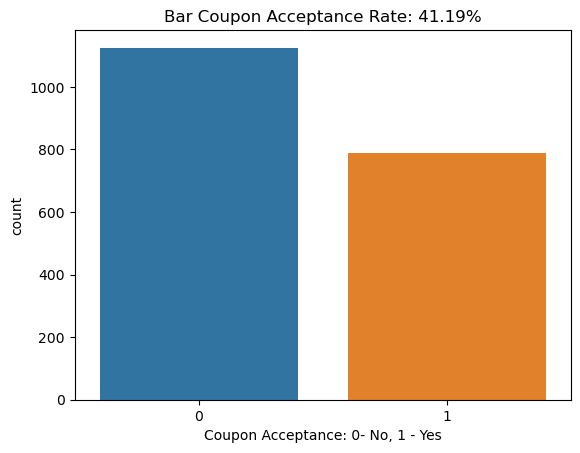

In [678]:
sns.countplot(data = data_bar, x = 'accepted_coupon')
plt.title('Bar Coupon Acceptance Rate: 41.19%')
plt.xlabel('Coupon Acceptance: 0- No, 1 - Yes')


plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [679]:
data_bar['bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

Creating a  column called BarVisitGroup, for 3 or fewer bar visits bar values are in[never,'less1','1~3'] else more than 3


Acceptance Rate:
BarVisitGroup
3 or fewer     37.267442
More than 3    76.165803
Name: count, dtype: float64


C:\Users\chand\AppData\Local\Temp\ipykernel_24348\879506334.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



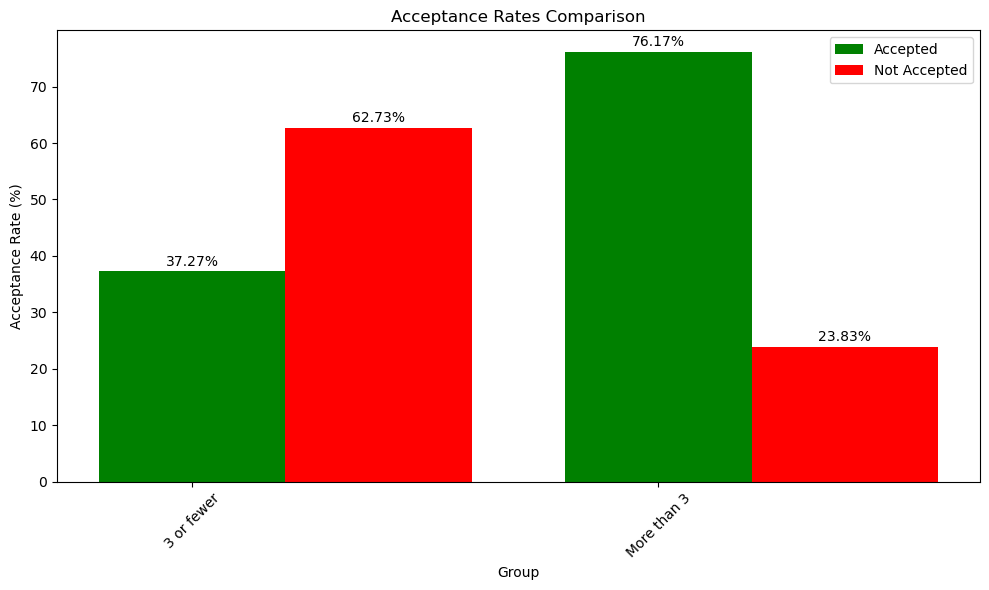

In [683]:
data_bar['BarVisitGroup'] = data_bar['bar'].apply(lambda x: '3 or fewer' if x in ['never', 'less1', '1~3'] else 'More than 3')
yes_counts = data_bar.loc[(data_bar['accepted_coupon']==1),'BarVisitGroup'].value_counts()
no_counts = data_bar.loc[(data_bar['accepted_coupon']==0),'BarVisitGroup'].value_counts()
total_counts = data_bar['BarVisitGroup'].value_counts()

# Calculate acceptance rates
acceptance_rate = (yes_counts / total_counts) * 100
non_acceptance_rate = (no_counts / total_counts) * 100

# Print acceptance rates
print("Acceptance Rate:")
print(acceptance_rate)

# Plotting the acceptance rates
plt.figure(figsize=(10, 6))  # Adjusted figure size for better readability
bar_width = 0.4  # Width of each bar

# Plot acceptance rates
plt.bar(range(len(acceptance_rate)), acceptance_rate, width=bar_width, label='Accepted', color='green')
# Plot non-acceptance rates next to acceptance rates
plt.bar([i + bar_width for i in range(len(non_acceptance_rate))], non_acceptance_rate, width=bar_width, label='Not Accepted', color='red')

# Adding titles and labels
plt.title('Acceptance Rates Comparison')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate (%)')

# Adding x-axis labels
plt.xticks(range(len(acceptance_rate)), acceptance_rate.index, rotation=45)

# Adding values on top of bars
for i, (v_accept, v_non_accept) in enumerate(zip(acceptance_rate, non_acceptance_rate)):
    plt.text(i, v_accept + 1, f'{v_accept:.2f}%', ha='center', color='black')
    plt.text(i + bar_width, v_non_accept + 1, f'{v_non_accept:.2f}%', ha='center', color='black')

plt.legend()

plt.tight_layout()
plt.show()



#### Outcome
Those who went to a bar more than 3 times a month accepted the bar coupon 76.17% of the times vs those who went to the bar 3 or fewer times a month accepted the coupon 32.27%. This indicates that more often people visit a bar, the greater chance that they will accept a bar coupon.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


C:\Users\chand\AppData\Local\Temp\ipykernel_24348\1085332159.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Acceptance Rate:
Group
Others                       33.774834
Over 25 and 1+ bar visits    68.982630
Name: count, dtype: float64


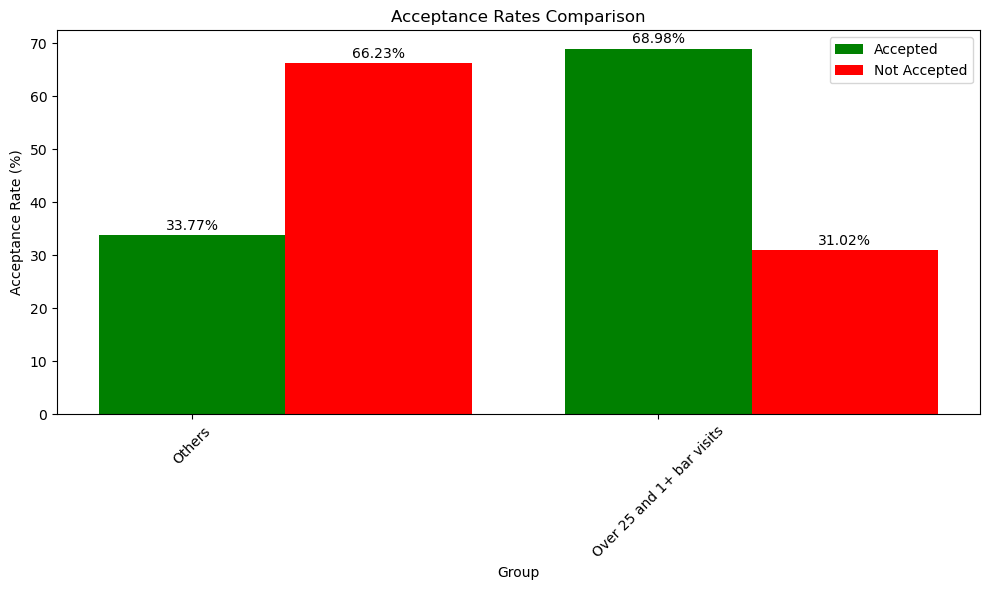

In [684]:
# Define categories for bar visits and ages
bar_visits_1_or_more = ['1~3', '4~8', 'gt8']
age_over_25 = [26, 31, 36, 41, 46, 50]

# Categorize based on conditions
data_bar['Group'] = 'Others'
data_bar.loc[(data_bar['bar'].isin(bar_visits_1_or_more)) & (data_bar['age_enc'] > 25), 'Group'] = 'Over 25 and 1+ bar visits'

# Count acceptance and total counts by group
yes_counts = data_bar.loc[data_bar['accepted_coupon'] == 1, 'Group'].value_counts()
no_counts = data_bar.loc[data_bar['accepted_coupon'] == 0, 'Group'].value_counts()
total_counts = data_bar['Group'].value_counts()

# Calculate acceptance rates
acceptance_rate = (yes_counts / total_counts) * 100
non_acceptance_rate = (no_counts / total_counts) * 100

# Print acceptance rates
print("Acceptance Rate:")
print(acceptance_rate)

# Plotting the acceptance rates
plt.figure(figsize=(10, 6))  # Adjusted figure size for better readability
bar_width = 0.4  # Width of each bar

# Plot acceptance rates
plt.bar(range(len(acceptance_rate)), acceptance_rate, width=bar_width, label='Accepted', color='green')
# Plot non-acceptance rates next to acceptance rates
plt.bar([i + bar_width for i in range(len(non_acceptance_rate))], non_acceptance_rate, width=bar_width, label='Not Accepted', color='red')

# Adding titles and labels
plt.title('Acceptance Rates Comparison')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate (%)')

# Adding x-axis labels
plt.xticks(range(len(acceptance_rate)), acceptance_rate.index, rotation=45)

# Adding values on top of bars
for i, (v_accept, v_non_accept) in enumerate(zip(acceptance_rate, non_acceptance_rate)):
    plt.text(i, v_accept + 1, f'{v_accept:.2f}%', ha='center', color='black')
    plt.text(i + bar_width, v_non_accept + 1, f'{v_non_accept:.2f}%', ha='center', color='black')

plt.legend()

plt.tight_layout()
plt.show()



#### Outcome
People who are over the age of 25 and went to the bar more than once a month accepted the bar coupons 68.98%  times. 
People who are below the age of 25 and went to the bar less than once a month accepted the bar coupons 33.77%  times. 


C:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



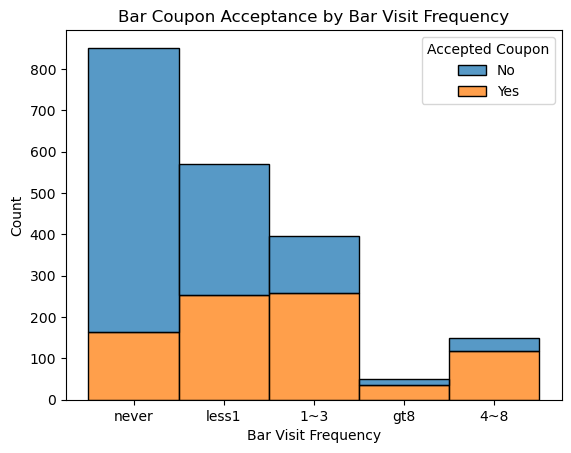

In [454]:
#Bar Coupon Acceptance rate by Bar visit frequency

sns.histplot(data = data_bar, x='bar', multiple='stack',  hue='accepted_coupon')
plt.title('Bar Coupon Acceptance by Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Count')
legend = plt.gca().get_legend()
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
legend.set_title('Accepted Coupon')
plt.show()

In [692]:
data1_enc.groupby(['accepted_coupon', 'bar']).size()   


accepted_coupon  bar  
0                1~3       889
                 4~8       382
                 gt8       141
                 less1    1465
                 never    2325
1                1~3      1481
                 4~8       672
                 gt8       186
                 less1    1929
                 never    2609
dtype: int64

#### Outcome
People who went to the bar between 1 to 3 times a month accepted the coupon the most (1481) vs People who went to the bar more than 8 times a month accepted the coupon the least (186) number of times.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


#### "Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry. 


C:\Users\chand\AppData\Local\Temp\ipykernel_24348\3051546856.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Acceptance Rate:
Group
Others                                                             37.877030
Bar 1+ per Month, Passenger Not Kid, Not farm,fish, or forestry    71.428571
Name: count, dtype: float64


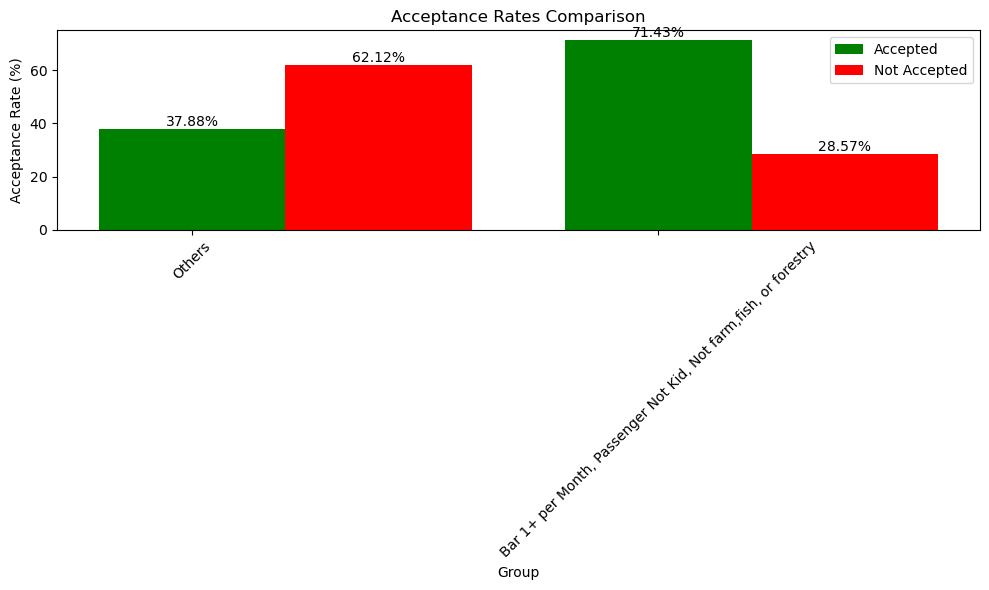

In [690]:
# 5a. & 6b. List of bar visits for those who go "more than once a month" (Note: includes once a month)
bar_visits_1_or_more = ['1~3','4~8','gt8']

# 5a. List of passengers that were "not a kid"
passenger_not_a_kid = ['Friend(s)','Partner']

# 5a.Occupation To be excluded
Occupation_Exclusion = ['Farming Fishing & Forestry' ] # Inverse of this (not in)

_5a_category = 'Bar 1+ per Month, Passenger Not Kid, Not farm,fish, or forestry'

# Categorize based on conditions
data_bar['Group'] = 'Others'
data_bar.loc[(data_bar['bar'].isin(bar_visits_1_or_more)) & (data_bar['passenger'].isin(passenger_not_a_kid))&~ (data_bar['occupation'].isin(Occupation_Exclusion)) , 'Group'] = _5a_category


# Count acceptance and total counts by group
yes_counts = data_bar.loc[data_bar['accepted_coupon'] == 1, 'Group'].value_counts()
no_counts = data_bar.loc[data_bar['accepted_coupon'] == 0, 'Group'].value_counts()
total_counts = data_bar['Group'].value_counts()

# Calculate acceptance rates
acceptance_rate = (yes_counts / total_counts) * 100
non_acceptance_rate = (no_counts / total_counts) * 100

# Print acceptance rates
print("Acceptance Rate:")
print(acceptance_rate)

# Plotting the acceptance rates
plt.figure(figsize=(10, 6))  # Adjusted figure size for better readability
bar_width = 0.4  # Width of each bar

# Plot acceptance rates
plt.bar(range(len(acceptance_rate)), acceptance_rate, width=bar_width, label='Accepted', color='green')
# Plot non-acceptance rates next to acceptance rates
plt.bar([i + bar_width for i in range(len(non_acceptance_rate))], non_acceptance_rate, width=bar_width, label='Not Accepted', color='red')

# Adding titles and labels
plt.title('Acceptance Rates Comparison')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate (%)')

# Adding x-axis labels
plt.xticks(range(len(acceptance_rate)), acceptance_rate.index, rotation=45)

# Adding values on top of bars
for i, (v_accept, v_non_accept) in enumerate(zip(acceptance_rate, non_acceptance_rate)):
    plt.text(i, v_accept + 1, f'{v_accept:.2f}%', ha='center', color='black')
    plt.text(i + bar_width, v_non_accept + 1, f'{v_non_accept:.2f}%', ha='center', color='black')

plt.legend()

plt.tight_layout()
plt.show()


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [693]:
data_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   destination                  1913 non-null   object
 1   passenger                    1913 non-null   object
 2   weather                      1913 non-null   object
 3   temperature                  1913 non-null   int64 
 4   time                         1913 non-null   object
 5   coupon                       1913 non-null   object
 6   expiration                   1913 non-null   object
 7   gender                       1913 non-null   object
 8   age                          1913 non-null   object
 9   marital_status               1913 non-null   object
 10  has_children                 1913 non-null   int64 
 11  education                    1913 non-null   object
 12  occupation                   1913 non-null   object
 13  income                       1913 no

C:\Users\chand\AppData\Local\Temp\ipykernel_24348\3833195769.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Acceptance Rate:
Group
Others                                                 32.479784
Bar 1+ per Month, Age Under 30                         70.731707
Cheap Restaurant 4+ per Month, Income Less than 50k    78.703704
Bar 1+ per Month, Passenger Not Kid, Not Widowed       62.666667
Name: count, dtype: float64


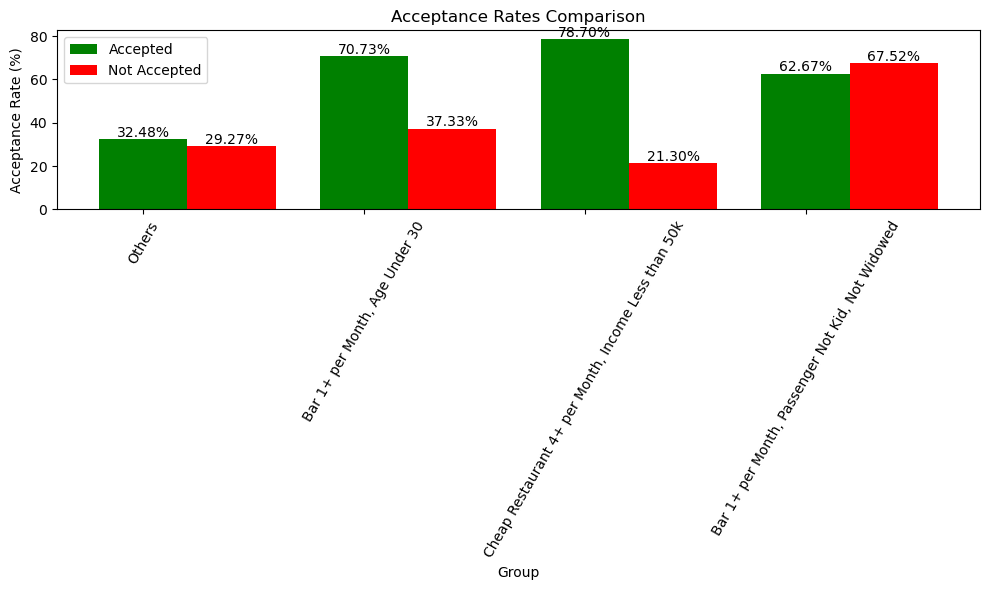

In [694]:
# 6a. & 6b. List of bar visits for those who go "more than once a month" (Note: includes once a month)
bar_visits_1_or_more = ['1~3','4~8','gt8']

# 6a. List of passengers that were "not a kid"
passenger_not_a_kid = ['Friend(s)','Partner']

# 6a. List of marital status for "not widowed"
marital_widowed = ['Widowed'] # Inverse of this (not in)

# 6b. List of ages for "under the age of 30"
age_under_30 = ['below21','21','26']

# 6c. List of "cheap" restaurant (restaurant_less_than_20) values representing "more than 4 times a month"
cheap_rest_4_times_or_more = ['4~8', 'gt8']

# 6c. List of income values representing "less than 50k"
income_less_than_50k = ['$37500 - $49999',
                        '$25000 - $37499',
                        '$12500 - $24999',
                        'Less than $12500']

_6a_category = 'Bar 1+ per Month, Passenger Not Kid, Not Widowed'
_6b_category = 'Bar 1+ per Month, Age Under 30'
_6c_category = 'Cheap Restaurant 4+ per Month, Income Less than 50k'

# Categorize based on conditions
data_bar['Group'] = 'Others'
data_bar.loc[(data_bar['bar'].isin(bar_visits_1_or_more)) & (data_bar['passenger'].isin(passenger_not_a_kid))
&~ (data_bar['marital_status'].isin(marital_widowed)) , 'Group'] = _6a_category
data_bar.loc[(data_bar['bar'].isin(bar_visits_1_or_more)) & (data_bar['age'].isin(age_under_30)) , 'Group'] = _6b_category
data_bar.loc[(data_bar['bar'].isin(cheap_rest_4_times_or_more)) & (data_bar['income'].isin(income_less_than_50k)) , 'Group'] = _6c_category


# Count acceptance and total counts by group
yes_counts = data_bar.loc[data_bar['accepted_coupon'] == 1, 'Group'].value_counts()
no_counts = data_bar.loc[data_bar['accepted_coupon'] == 0, 'Group'].value_counts()
total_counts = data_bar['Group'].value_counts()

# Calculate acceptance rates
acceptance_rate = (yes_counts / total_counts) * 100
non_acceptance_rate = (no_counts / total_counts) * 100

# Print acceptance rates
print("Acceptance Rate:")
print(acceptance_rate)

# Plotting the acceptance rates
plt.figure(figsize=(10, 6))  # Adjusted figure size for better readability
bar_width = 0.4  # Width of each bar

# Plot acceptance rates
plt.bar(range(len(acceptance_rate)), acceptance_rate, width=bar_width, label='Accepted', color='green')
# Plot non-acceptance rates next to acceptance rates
plt.bar([i + bar_width for i in range(len(non_acceptance_rate))], non_acceptance_rate, width=bar_width, label='Not Accepted', color='red')

# Adding titles and labels
plt.title('Acceptance Rates Comparison')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate (%)')

# Adding x-axis labels
plt.xticks(range(len(acceptance_rate)), acceptance_rate.index, rotation=60)

# Adding values on top of bars
for i, (v_accept, v_non_accept) in enumerate(zip(acceptance_rate, non_acceptance_rate)):
    plt.text(i, v_accept + 1, f'{v_accept:.2f}%', ha='center', color='black')
    plt.text(i + bar_width, v_non_accept + 1, f'{v_non_accept:.2f}%', ha='center', color='black')

plt.legend()

plt.tight_layout()
plt.show()


#### Heres  the acceptance rates between those drivers who:

Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed has an acceptance rate of 62.66%

Drivers who go to bars more than once a month and are under the age of 30 has an acceptance rate of 70.73%

Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K has an acceptance ra of f 78.0%



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### "Hypothesis:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K."
- 
 Of the 3 conditions listed above, the 2 had about the acceptance rate above 70%. 
Those that went to a bar 1 or more times a month, and under the age of 30, accepted the coupon 71.10% of the time.
Those who went to cheap restaurants more than 4 times a month and income is less than 50K. accepted the coupon 78.70% of the times.Possibility is those conditions are targeting the same population. However, the third condition is significantly different.
Those that went to a bar 1 or more times a month, had pasesengers that were not a kid, and were not widowed, accepted the coupon 63%% of the time.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Coffee Coupons

The next dataset I looked at are the coupons for Coffee Houses. I started by creating a subset of the data in a new dataframe called `df_coffee` as before.

In [696]:
# Create a dataframe where the coupon was just for a Coffee House, derive it from the cleaned dataset

data_coffee = data1_enc[data1_enc['coupon']=='Coffee House']
data_coffee.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,time_enc,expiration_enc,bar_enc,coffee_house_enc,carry_away_enc,restaurant_less_than_20_enc,restaurant_20_to_50_enc,employed,education_years,income_enc
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,10,2,0,0,4,4,0,1,8,62500
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,14,24,0,0,4,4,0,1,8,62500
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,14,2,0,0,4,4,0,1,8,62500
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,14,24,0,0,4,4,0,1,8,62500
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,18,2,0,0,4,4,0,1,8,62500


In [697]:
# Verify we filtered down to the right set of data, and do a quick visual scan 
print("\nUnique values of 'coupon' in df_coffee:", data_coffee['coupon'].unique())
print(len(data_coffee), "records in total\n")



Unique values of 'coupon' in df_coffee: ['Coffee House']
3816 records in total



In [494]:
### Coffee Coupon Acceptance Rate


Proportion of Coffee coupons that were accepted: 49.63%



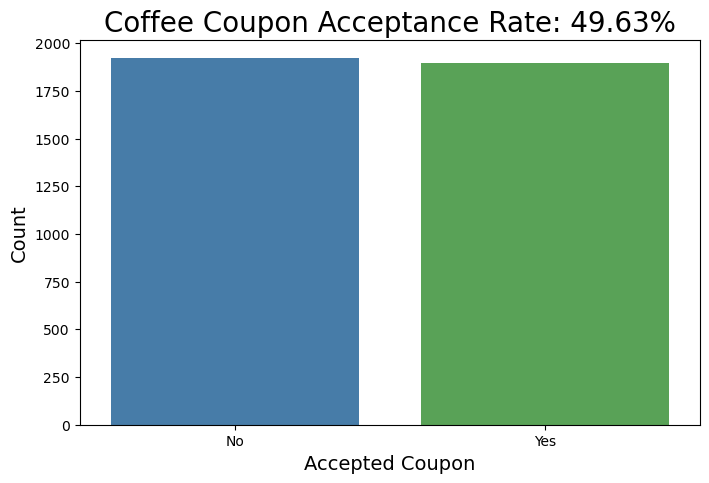

In [699]:
# Create a custom color palette to differentiate these charts
#temp_palette = sns.color_palette('Set1')
#print(temp_palette.as_hex())
coffee_colors = ["#377eb8", '#4daf4a', "#e41a1c", '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']
coffee_palette = sns.color_palette(coffee_colors)

# Calculate percent that accepted vs. total "Coffee House" coupon records
coffee_percent_accepted = data_coffee['accepted_coupon'].mean() * 100
print(f"\nProportion of Coffee coupons that were accepted: {coffee_percent_accepted:.2f}%\n")

# Create a countplot showing this proportion
plt.figure(figsize=(8,5))
sns.countplot(x='accepted_coupon', data=data_coffee, palette=coffee_palette)
plt.title('Coffee Coupon Acceptance Rate: 49.63%', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Accepted Coupon', fontsize=14)
ax = plt.gca()
ax.set_xticklabels(["No", "Yes"])
plt.show()

### Insight

    49.63% of the Coffee coupons were accepted, pretty much an even split between accepting and not accepting coffee coupons

### Coffee Coupon Acceptance Rate vs. Visit Frequency

#### "Compare the acceptance rate between those who went to a coffee shop 1 or more times a month, to those who went less."¶

We saw that frequency of visits to a coffee house was positively correlated with acceptance rate (0.21). Let's take a closer look at this relationship. We'll compare those who visit a coffee shop more frequently vs. less frequently.

In [498]:
data_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   destination                  3996 non-null   object
 1   passenger                    3996 non-null   object
 2   weather                      3996 non-null   object
 3   temperature                  3996 non-null   int64 
 4   time                         3996 non-null   object
 5   coupon                       3996 non-null   object
 6   expiration                   3996 non-null   object
 7   gender                       3996 non-null   object
 8   age                          3996 non-null   object
 9   marital_status               3996 non-null   object
 10  has_children                 3996 non-null   int64 
 11  education                    3996 non-null   object
 12  occupation                   3996 non-null   object
 13  income                       3996 non

In [700]:
data_coffee['coffee_house'].unique()

array(['less1', '4~8', '1~3', 'gt8', 'never'], dtype=object)

Acceptance Rate:
CoffeeVisitGroup
1 or Less than 1    34.034908
More than 1         65.899358
Name: count, dtype: float64


C:\Users\chand\AppData\Local\Temp\ipykernel_24348\3862875986.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



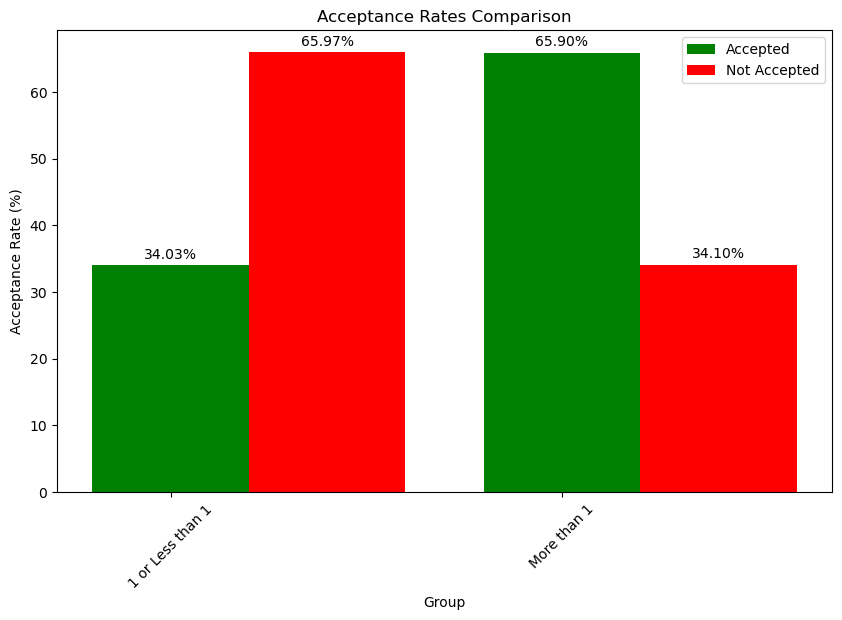

In [702]:

data_coffee['CoffeeVisitGroup'] = data_coffee['coffee_house'].apply(lambda x: 'More than 1' if x in ['1~3','4~8','gt8'] else '1 or Less than 1')
yes_counts = data_coffee.loc[(data_coffee['accepted_coupon']==1),'CoffeeVisitGroup'].value_counts()
no_counts = data_coffee.loc[(data_coffee['accepted_coupon']==0),'CoffeeVisitGroup'].value_counts()
total_counts = data_coffee['CoffeeVisitGroup'].value_counts()

# Calculate acceptance rates
acceptance_rate = (yes_counts / total_counts) * 100
non_acceptance_rate = (no_counts / total_counts) * 100

# Print acceptance rates
print("Acceptance Rate:")
print(acceptance_rate)

# Plotting the acceptance rates
plt.figure(figsize=(10, 6))  # Adjusted figure size for better readability
bar_width = 0.4  # Width of each bar

# Plot acceptance rates
plt.bar(range(len(acceptance_rate)), acceptance_rate, width=bar_width, label='Accepted', color='green')
# Plot non-acceptance rates next to acceptance rates
plt.bar([i + bar_width for i in range(len(non_acceptance_rate))], non_acceptance_rate, width=bar_width, label='Not Accepted', color='red')

# Adding titles and labels
plt.title('Acceptance Rates Comparison')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate (%)')

# Adding x-axis labels
plt.xticks(range(len(acceptance_rate)), acceptance_rate.index, rotation=45)

# Adding values on top of bars
for i, (v_accept, v_non_accept) in enumerate(zip(acceptance_rate, non_acceptance_rate)):
    plt.text(i, v_accept + 1, f'{v_accept:.2f}%', ha='center', color='black')
    plt.text(i + bar_width, v_non_accept + 1, f'{v_non_accept:.2f}%', ha='center', color='black')

plt.legend()

#plt.tight_layout()
plt.show()



C:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



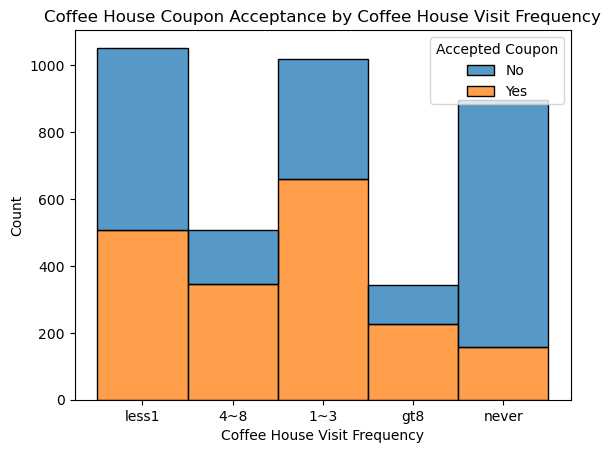

In [703]:
#Coffee House Coupon Acceptance rate by Coffee House visit frequency

sns.histplot(data = data_coffee, x='coffee_house', multiple='stack',  hue='accepted_coupon')
plt.title('Coffee House Coupon Acceptance by Coffee House Visit Frequency')
plt.xlabel('Coffee House Visit Frequency')
plt.ylabel('Count')
legend = plt.gca().get_legend()
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
legend.set_title('Accepted Coupon')
plt.show()

In [ ]:
### Coffee Coupon Acceptance Rate vs. Destination

#### "Compare the acceptance rate between various driving destinations."¶

We saw that the driving destination "No Urgent Place" was positively correlated with coupon acceptance (0.18). Let's take a closer look at this relationship. 
I am creating a histplot showing accepts and declines for the 3 destinations, and compute a contingency table and plot the normalized values in a heatmap.

C:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



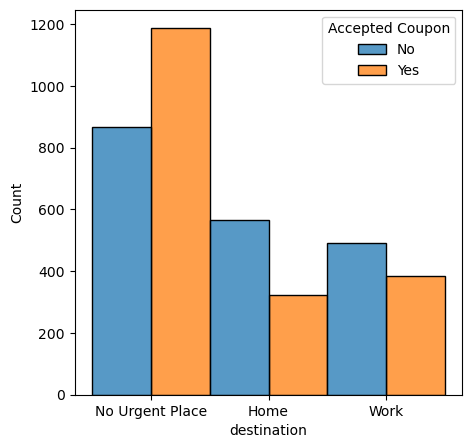

In [704]:
plt.figure(figsize=(5,5))
sns.histplot(data = data_coffee, x='destination', multiple='dodge',  hue='accepted_coupon')
plt.xlabel('destination')
plt.ylabel('Count')
legend = plt.gca().get_legend()
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
legend.set_title('Accepted Coupon')

### Insight

In the histplot, we can see that there were more accepts than declines in one condition only: "No Urgent Place".

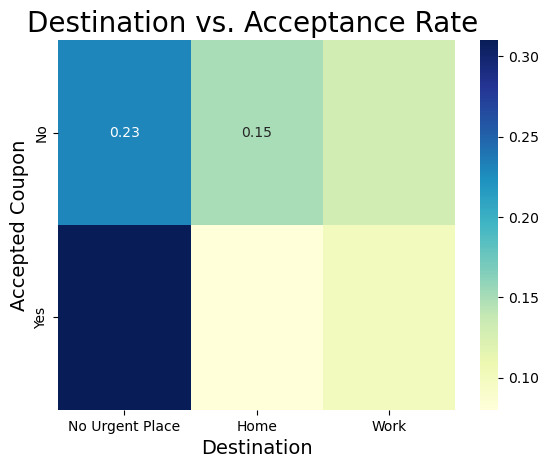

In [705]:
# Create a contingency table or cross tabulation of this data
dest_crosstab = pd.crosstab(data_coffee.accepted_coupon, data_coffee.destination, normalize = True)
dest_crosstab = round(dest_crosstab.rename(index = {0:'No', 1:'Yes'}), 2)
dest_order = ['No Urgent Place', 'Home', 'Work']
dest_crosstab = dest_crosstab[dest_order]

# Show the crosstab in a heatmap
sns.heatmap(dest_crosstab, cmap='YlGnBu', annot=True)
plt.title('Destination vs. Acceptance Rate ', fontsize=20)
plt.ylabel('Accepted Coupon', fontsize=14)
plt.xlabel('Destination', fontsize=14)

plt.show()

### Coffee Coupon Acceptance Rate vs. Occupation


#### "Compare the coffee coupon acceptance rate between various occupations."¶


C:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



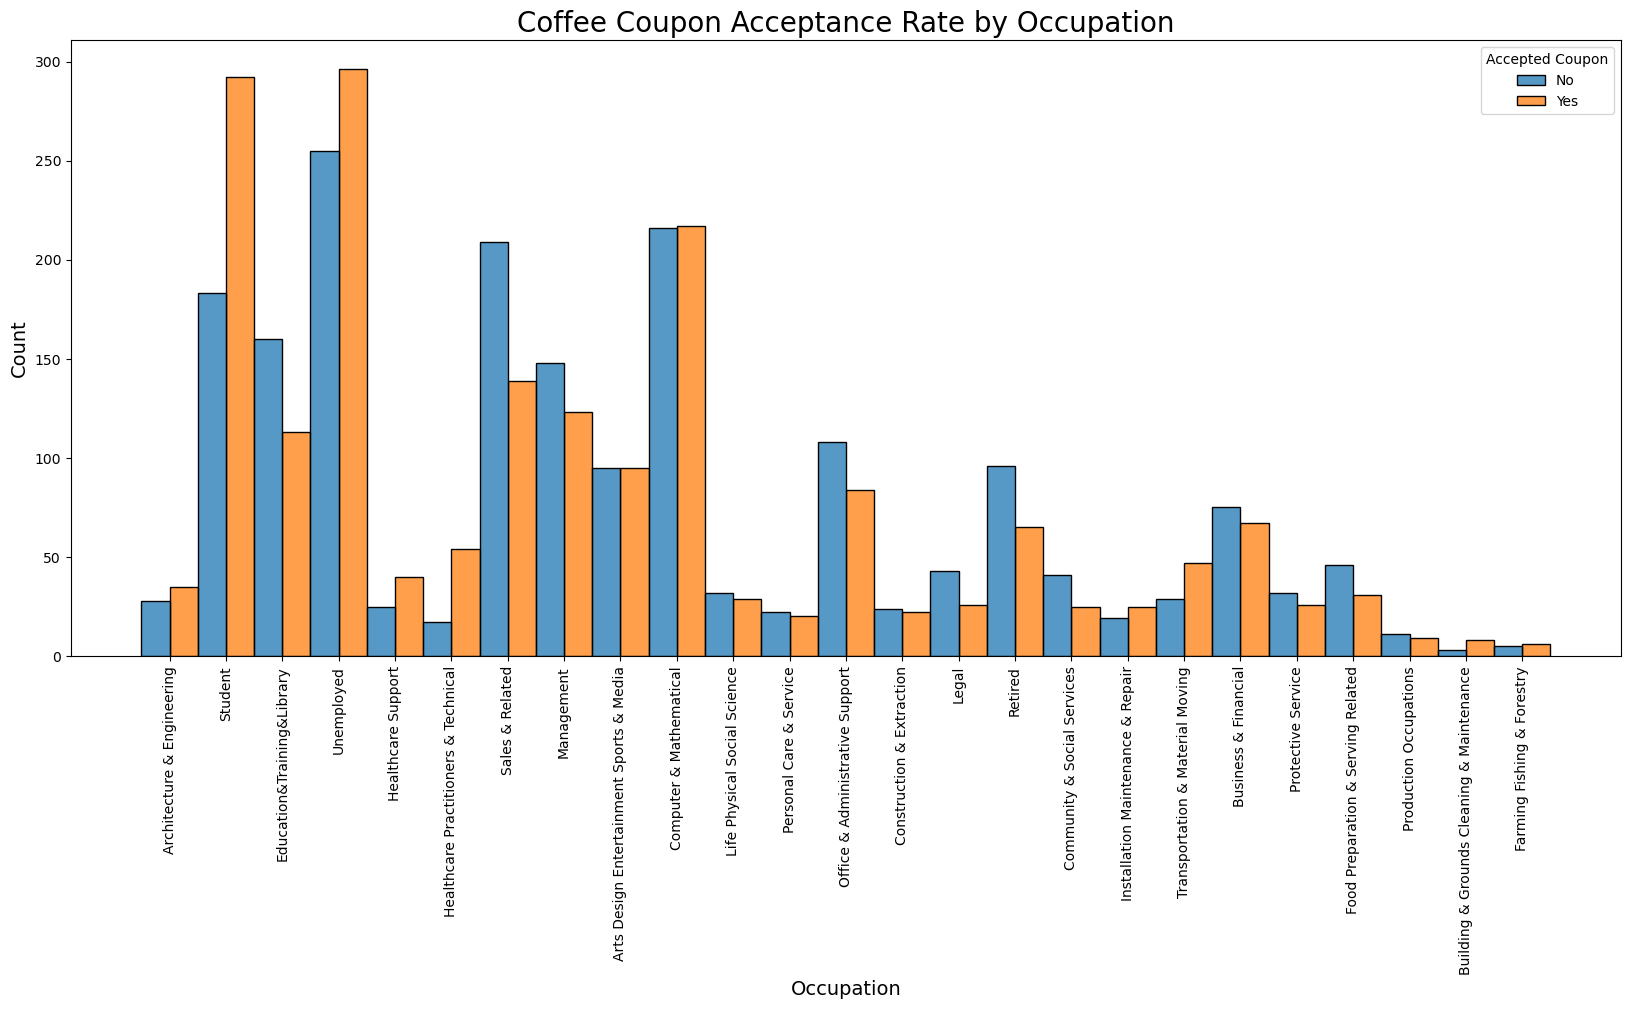

In [706]:
# Compute the count for each occupation where accepted_coupon equals to 1
occupation_count = data_coffee[data_coffee['accepted_coupon'] == 1]['occupation'].value_counts()

# Get the occupations in descending order of count
occupation_order = occupation_count.index

# Plot the countplot with the order specified
plt.figure(figsize=(20,8))
#sns.countplot(data=data_coffee, hue='accepted_coupon', x='occupation', order=occupation_order, palette=coffee_palette)
sns.histplot(data = data_coffee, x='occupation', multiple='dodge',  hue='accepted_coupon')
plt.title('Coffee Coupon Acceptance Rate by Occupation', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation=90)
legend = plt.gca().get_legend()
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
legend.set_title('Accepted Coupon')
plt.show()

### Insight
    The bars in this histplot shows that "Unemployed" and "Student" had the largest number of people accepting coupons. "Unemployed" category has also the largest number of declines. For "Student" we can see there are substantially more accepts than declines here.


### Coffee Coupon Acceptance Rate vs. Age
    

Acceptance Rate:
age_enc
20    41.975309
21    50.377834
26    48.641304
31    37.654321
36    30.612245
41    43.859649
46    36.893204
50    29.304029
Name: count, dtype: float64


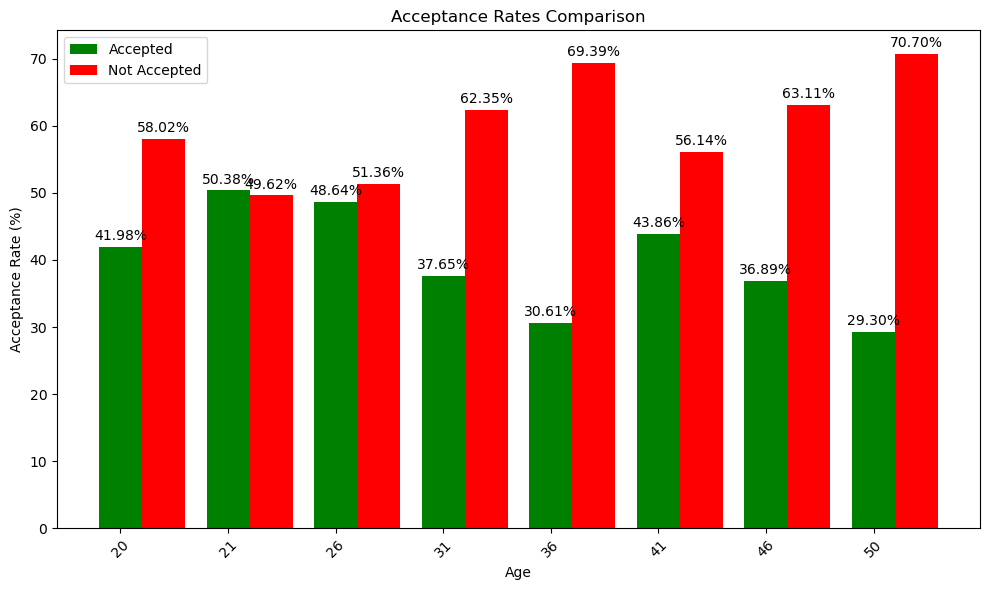

In [714]:

# Count acceptance and total counts by age
yes_counts = data_bar.loc[data_bar['accepted_coupon'] == 1, 'age_enc'].value_counts()
no_counts = data_bar.loc[data_bar['accepted_coupon'] == 0, 'age_enc'].value_counts()
total_counts = data_bar['age_enc'].value_counts()

# Calculate acceptance rates
acceptance_rate = (yes_counts / total_counts) * 100
non_acceptance_rate = (no_counts / total_counts) * 100

# Print acceptance rates
print("Acceptance Rate:")
print(acceptance_rate)

# Plotting the acceptance rates
plt.figure(figsize=(10, 6))  # Adjusted figure size for better readability
bar_width = 0.4  # Width of each bar

# Plot acceptance rates
plt.bar(range(len(acceptance_rate)), acceptance_rate, width=bar_width, label='Accepted', color='green')
# Plot non-acceptance rates next to acceptance rates
plt.bar([i + bar_width for i in range(len(non_acceptance_rate))], non_acceptance_rate, width=bar_width, label='Not Accepted', color='red')

# Adding titles and labels
plt.title('Acceptance Rates Comparison')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate (%)')

# Adding x-axis labels
plt.xticks(range(len(acceptance_rate)), acceptance_rate.index, rotation=45)

# Adding values on top of bars
for i, (v_accept, v_non_accept) in enumerate(zip(acceptance_rate, non_acceptance_rate)):
    plt.text(i, v_accept + 1, f'{v_accept:.2f}%', ha='center', color='black')
    plt.text(i + bar_width, v_non_accept + 1, f'{v_non_accept:.2f}%', ha='center', color='black')

plt.legend()

plt.tight_layout()
plt.show()



#### Insight
#### Bar Coupon Analysis

Here's what we've learned from our investigation of Bar Coupons:

Proportion of Bar coupons that were accepted: 41.
19%
Bar coupons were accepted by frequent bar visitor – 
those who went to a bar more than 3  times a month accepted the bar coupon 76.17% of the times vs those who went to the bar 3 or fewer times a month accepted the coupon 32.27%. This indicates that more often people visit a bar, the greater chance that they will accept a bar co
upon.
People who went to the bar between 1 to 3 times a month accepted the coupon the most (1481) vs People who went to the bar more than 8 times a month accepted the coupon the least (186) number of t
imes.
Based on theage - 
People who are over the age of 25 and went to the bar more than once a month accepted the bar coupons 68.98%  times. People who are below the age of 25 and went to the bar less than once a month accepted the bar coupons 33.77% 
 times. 
Based on those who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry. 
71.43% of those that went to a bar 1 or more times a month, had passengers that were not a kid and had occupations other than farming, fishing, or forestry accepted the coupons vs those passengers that were a kid and had occupations other than farming, fishing, or forestry accepted the coupons on
ly 37.88%
Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed has an acceptance rate
 of 62.66%
Drivers who go to bars more than once a month and are under the age of 30 has an acceptance rat
e of 70.73%
Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K has an acceptance rat#### Coffee Coupore acceptance.

    

#### Insight
#### Coffee Coupon Analysise

Here's what we've learned from our investigation of CoffeeCoupons:

Proportion of Coffee coupons that were accepted: 49.63%. Pretty much an even split between accepting and not acp

ting coffee coup

ons
Coffee coupons acceptance rate by frequent coffee visitors – Drivers who visit coffee house “1 or less than 1”  times have the acceptance rate of 34.03% vs those who visited “more than 1” times has an acpt

ance rate of  65

.89%
Drivers who are driving to the destination of “No Urgent Place” have more acept
ance than declin
es. 
Drivers who are driving to the destination of “Home” have least acceptance as compare to t
he other destin
ations
"Unemployed" and "Student" have the largest number of people accepting coupons. "Unemployed" category also has the laest n

umber of decline

s. For "Student" there are substantially mor accep
ts than declines
 here.
Younger people (age 21)  accepted coffee coupons more than older people. There was roughly an equal ratio of accepts vs.ecline

s in most age brackets. The exception was "50 plus", has more declines, and "below 21", has more acceptance.

    